## Introduction
$$
\newcommand{\vx}{\mathbf{x}}
\newcommand{\vX}{\mathbf{X}}
\newcommand{\vmu}{\mathbf{\mu}}
\newcommand{\vr}{\mathbf{r}}
\newcommand{\vxi}{\vx_i}
\newcommand{\vri}{\vr_i}
$$
Like everyone else, my initial reaction to <a href="https://en.wikipedia.org/wiki/Stein%27s_example">Stein's phenomenon</a> was utter amazement. Strangely, as I learned more about the intuition behind the James-Stein estimator, I found myself completely bought in and wondering instead why shrinkage wasn't better even in 1 or 2 dimensions. My investigations into this revealed a simple, and perhaps novel, geometric way to understand its mechanics.

To recap, for 3 or more independent normal variables $\vX = \{X_1, ... , X_p\}$, the Charles Stein discovered that the set of sample means $\mathbf{\bar{\vx}} = \{\bar{x_1}, ..., \bar{x_p}\}$ is not the best estimator of the mean of $\vX$, i.e., $\mathbf{\mu} = \{\mu(X_1), ..., \mu(X_p)\}$. Instead, if we shrink all the sample means, the mean squared error across the whole set of estimates is reduced.

In 1961, Williard James and Charles Stein came up with an estimator that performs better no matter where $\mu$ lies, making the vanilla MLE estimator $\mathbf{\hat{\mu}}_{MLE} = \mathbf{\bar{x}}$ <a href="https://en.wikipedia.org/wiki/Admissible_decision_rule">inadmissible</a>. The James-Stein estimator is $\mathbf{\hat{\mu}}_{JS} = \left(1 - \frac{(p - 2) \sigma^2}{|\bar{\vx}|^2}\right)\bar{\vx}$ where $p$ is the dimensions of $\vX$ and $|\cdot|$ is the l-2 norm. You can see that this estimator takes the MLE estimate and shrinks it toward zero. This diagram illustrates the shrinkage effect:

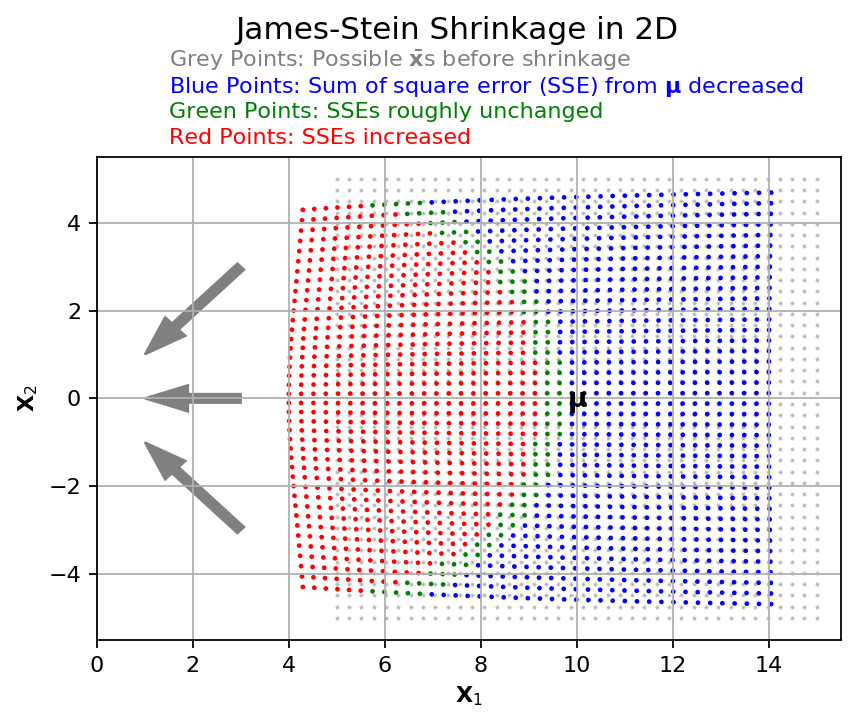

In [186]:
meshplot()

Moving forward, I'm going to examine a simplified version of the James-Stein estimator. First, I'll pretend we only have a single observation of each variable, so the sample means $\bar{\vx}$ will just be the observations $\vx$. Second, the $(p-2)$ term in the numerator neuters the shrinkage when there are fewer than 3 dimensions. But this is exactly what I want to study, so I'm going to strip out the numerator and just look at $\left(1 - \frac{1}{|\vx|^2}\right)$.

## Pairwise Weakness

The first thing to notice is that $\left(1 - \frac{1}{|\vx|^2}\right)$ is slightly pathological. It shrinks nearer points more than those further out. Here's a one dimensional example. The mean of $\vX$, $\vmu$, lies at 3, and we have two samples drawn from $\vX$: $A$ at 2 and $B$ at 4. As expected, $B$ is shrunk toward $\vmu$ and $A$ is shrunk away; but the improvement in $B$ is outweighed by the regression in $A$, creating a net increase in mean squared error.

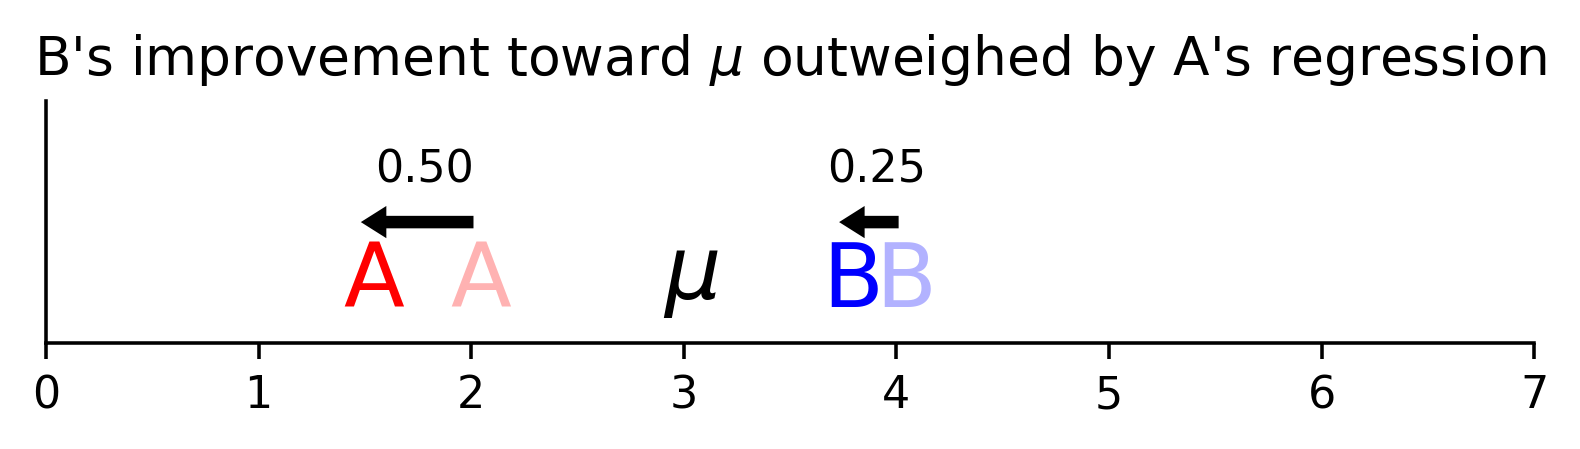

In [192]:
plot_pairwise()

This weakness is exactly why James-Stein does not work in one dimension (ie. we only have one random variable). Since normal random variables vary symmetrically about their mean, for every point on the left of $\mathbf{\mu}$, we can expect another on the right about the same distance away. Each pair adds squared error, causing the estimator to be inadmissible.

The good news is that this weakness disappears as $\mathbf{\mu}$ moves further away from the origin. For a pair $A$ and $B$ which are some vector $\vr$ away from $\vmu$, the squared error they add due to shrinkage is
$\frac{1}{|\vmu-\vr|^2} + \frac{2\vr}{|\vmu-\vr|} + \frac{1}{|\vmu+\vr|^2} - \frac{2\vr}{|\vmu+\vr|}$ (derivation in appendix). An intuitive way to think of this is that we can pull $\vmu$ so far from the origin that when we zoom out to see the whole picture, $A$ and $B$ appear right on top of $\vmu$ so their net error contribution is vanishingly small.

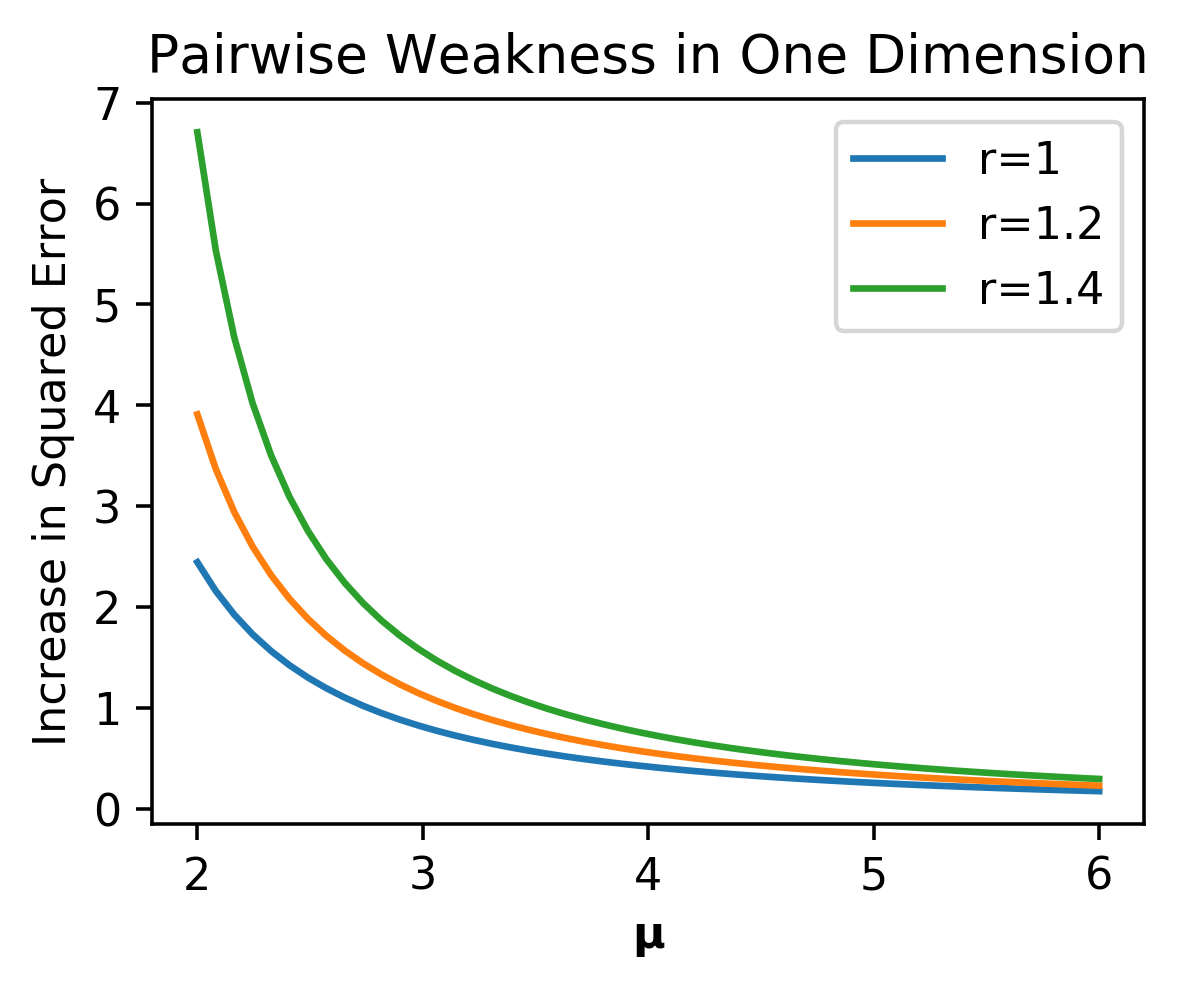

In [193]:
plot_pairwise_trend()

## Helped-Hurt Ratio

If we were to end here, it would seem as if the James-Stein estimator were doomed to failure. Thankfully, it has something going for it. For a one dimensional gaussian, the ratio of points that are helped to those that are hurt is 1:1 due to symmetry. However, the symmetry is broken in higher dimensions. This allows the helped-hurt ratio to increase so that the James-Stein estimator has a shot at overcoming its pairwise weakness.

To calculate the helped-hurt ratio of a spherical space, we make the key observation that for estimates like $A$, $B$, and $C$, their angles with $\mu$ determine if they are is helped or hurt. In the diagram below, we plot them out so the x coordinate is the value of first random variables $X_1$, and y the second, $X_2$. If that angle is exactly 90 degrees, then the marginal shrinkage toward the origin moves it along its tangent which neither hurts nor helps it. If the angle is obtuse, marginal shrinkage brings it to a greater radius from $\mu$ thus hurting it. Finally, as you guessed, an acute angle ensures that shrinkage pulls the point closer to $\mu$ which helps it.

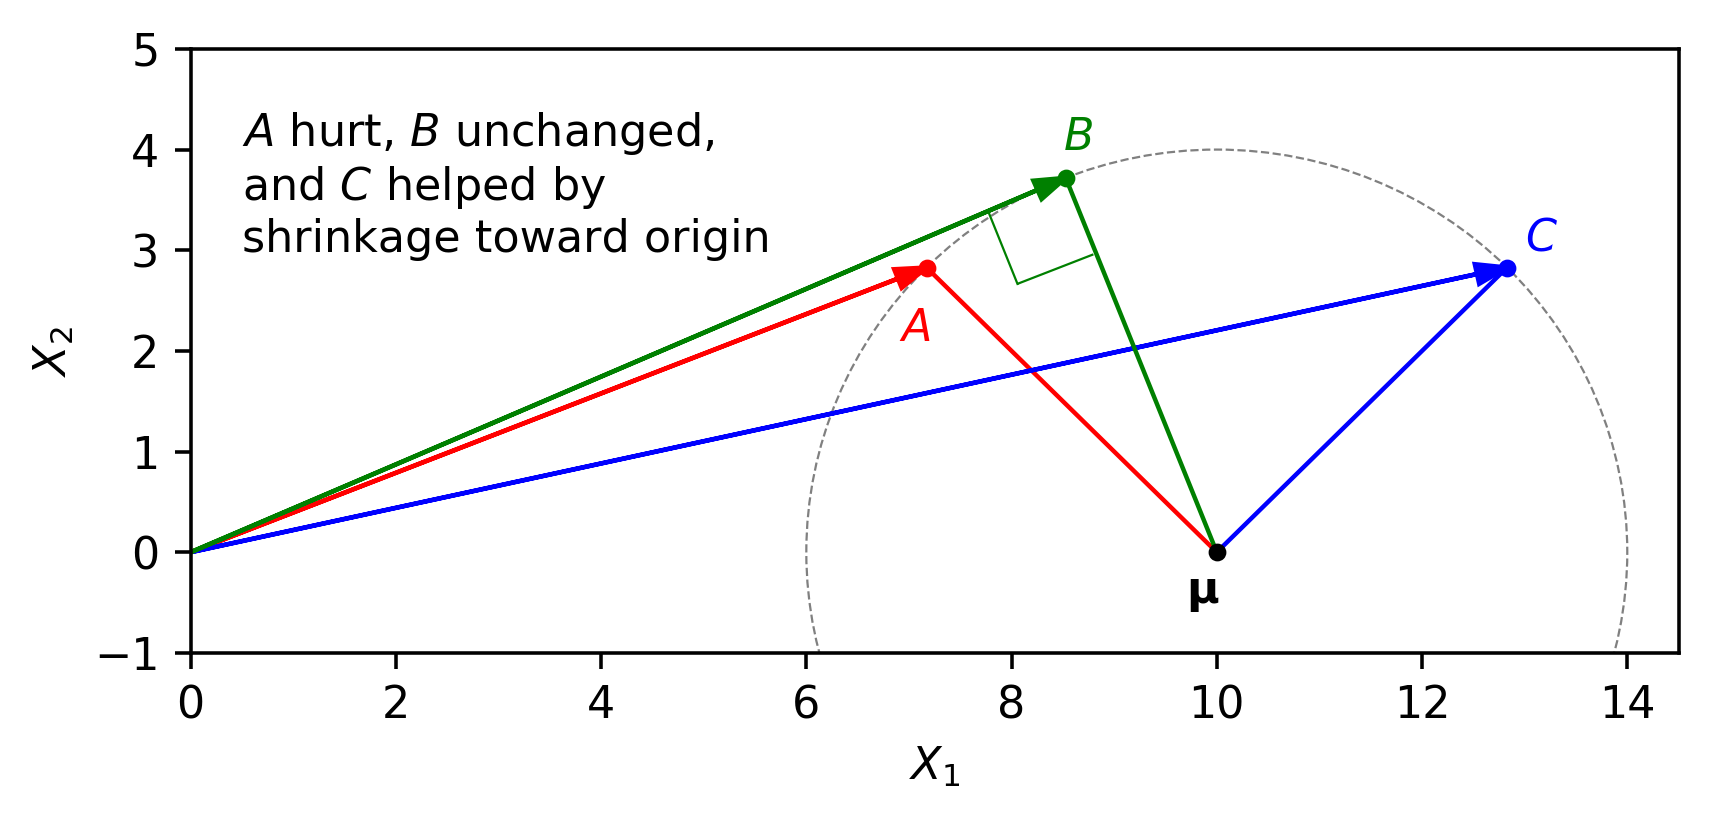

In [309]:
plot_tangency_condition()

Tangency points like $B$ are delineate the boundary between helped and hurt regions so we want to map out their locations. By plotting out various tangency points at different distances away from $\mu$, we notice an invariant: Each of them forms a right-angled triangle with $\vmu$ as the hypotenuse. By Pythagoras' theorem, all the tangency points must share the same total squared distance between the origin and $\vmu$; and that sum must equal $|\vmu|^2$. This tells us that all the points where $|\vx|^2 + |\vx-\vmu|^2 < |\vmu|^2$ are helped, and the others are hurt or unchanged. 

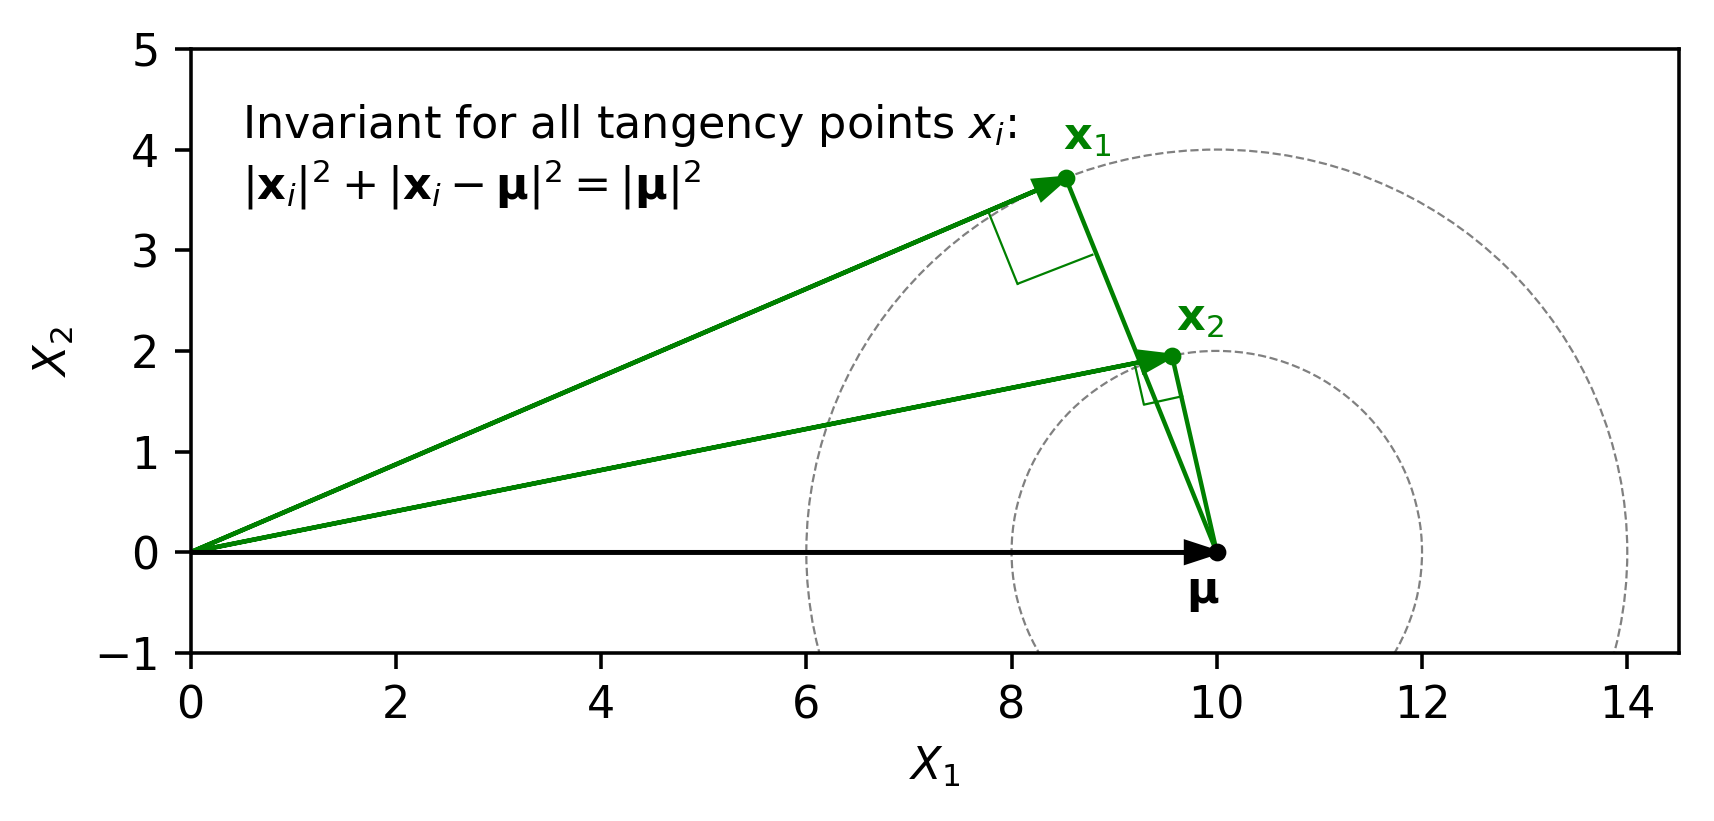

In [310]:
plot_tangency_invariant()

## Conclusion

## Resources and Credits
- <a href="liv810.github.io">Olivia Angiuli</a> for introducing me to the Stein phenomenon
- <a href="https://www.naftaliharris.com/blog/steinviz/">Visualizing the James-Stein Estimator</a> by Naftali Harris
- <a href="https://arxiv.org/pdf/1203.4737.pdf">A Geometrical Explanation of Stein Shrinkage</a> by Brown and Zhao
- <a href="https://www.stat.washington.edu/~pdhoff/courses/581/LectureNotes/shrinkage.pdf">Shrinkage Estimators</a> by Peter Hoff
- <a href="https://stats.stackexchange.com/questions/13494/intuition-behind-why-steins-paradox-only-applies-in-dimensions-ge-3">Intuition behind why Stein's paradox only applies in dimensions ≥3</a> on StackExchange
- <a href="www.statslab.cam.ac.uk/~rjs57/SteinParadox.pdf">Stein's Paradox</a> by Richard Samworth
- <a href="http://statweb.stanford.edu/~ckirby/brad/other/Article1977.pdf">Stein's Paradox in Statistics</a> by Efron and Morris

## Appendix

#### Net Squared Error of a Pair of Points

Recall that $A$ is at $\mathbf{x}-\mathbf{r}$ and $B$ is at $\mathbf{x}+\mathbf{r}$. Note that $|\cdot|$ means the l-2 norm, traditionally written as $||\cdot||_2$.

First, realize that the multi-dimensional case reduces to the single dimensional one:

$$
\begin{align}
\text{ squared_error_after } - \text{ squared_error_before }
&= \big|\text{ error_after }\big|^2 - \big|\text{ error_before }\big|^2 \\
&= \sum_{i=1}^p \text{ error_after }_i^2  - \sum_{i=1}^p \text{error_before }_i^2 \\
&= \sum_{i=1}^p (\text{ error_after }_i^2 - \text{ error_before }_i^2)
\end{align}
$$

For A:
$$
\begin{align}
\text{ error_after }_i^2 - \text{ error_before }_i^2
&= \big[\big(1-\frac{1}{|\vx-\vr|^2}\big)(\vxi-\vri) - \vxi\big]^2 - \big[(\vxi-\vri) - \vxi\big]^2 \\
&= \big[\big(1-\frac{1}{|\vx-\vr|^2}\big)(\vxi-\vri) - (\vxi-\vri)\big]
   \big[\big(1-\frac{1}{|\vx-\vr|^2}\big)(\vxi-\vri) - (\vxi+\vri)\big] \\
&= \big[\big( -\frac{1}{|\vx-\vr|^2}\big)(\vxi-\vri)\big]
   \big[\big( -\frac{1}{|\vx-\vr|^2}\big)(\vxi-\vri) - 2\vri\big]\\
&= \frac{(\vxi-\vri)^2}{|\vx-\vr|^4} + \frac{2\vri(\vxi-\vri)}{|\vx-\vr|^2} \\
\end{align}
$$

Now stuffing this back into the sum:
$$
\begin{align}
\text{ squared_error_change }_{A}
&= \frac{1}{|\vx-\vr|^2} \sum_{i=1}^p \big(\frac{(\vxi-\vri)^2}{|\vx-\vr|^2} + 2\vri(\vxi-\vri)\big) \\
&=\frac{1}{|\vx-\vr|^2}\big(1 + \sum_{i=1}^p 2\vri(\vxi-\vri)\big)
\end{align}
$$

And the result for B is very similar:
$$
\begin{align}
\text{ squared_error_change }_{B}
&=\frac{1}{|\vx+\vr|^2}\big(1 - \sum_{i=1}^p 2\vri(\vxi+\vri)\big)
\end{align}
$$

## Scratch Work

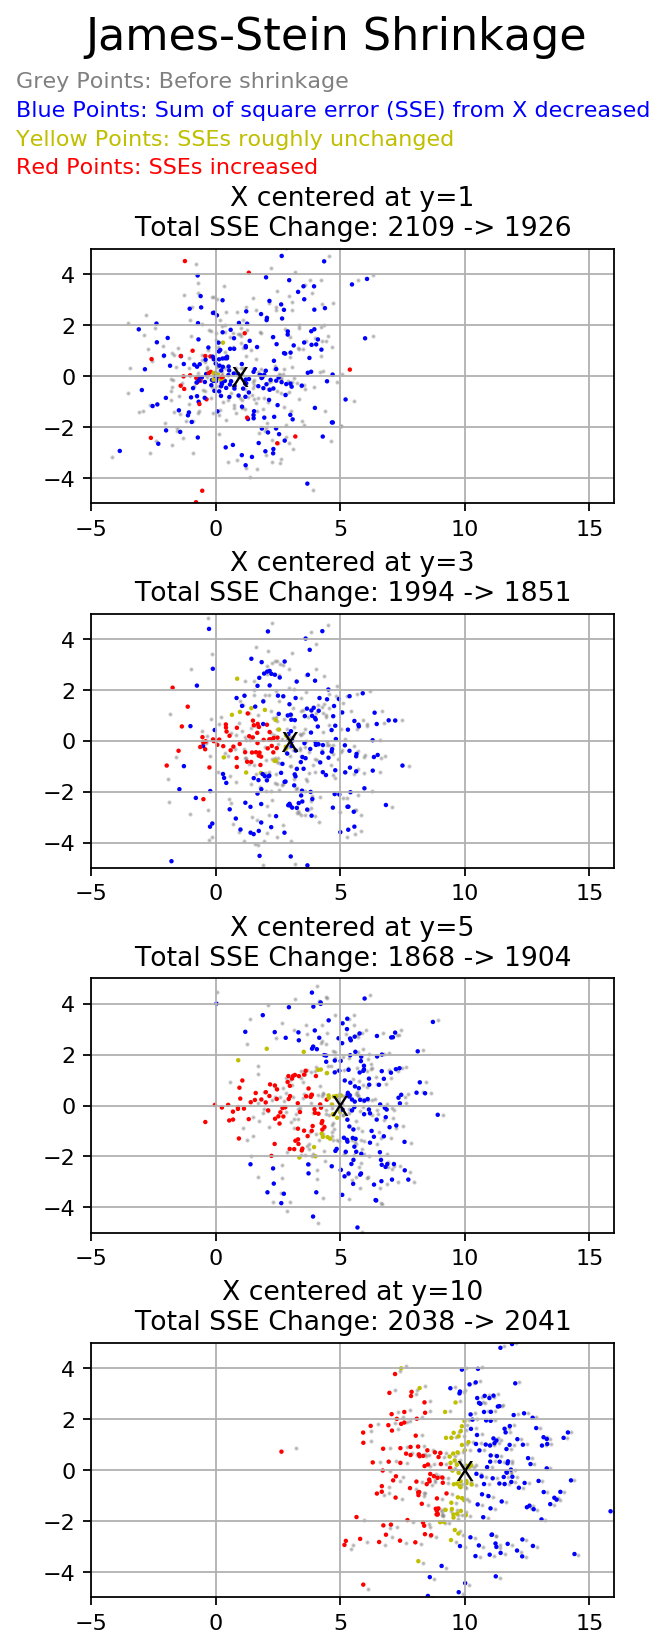

In [31]:
fig, axs = plt.subplots(4, 1, figsize=(4,9), dpi=160)
plt.tight_layout(h_pad=3)

fig.suptitle('James-Stein Shrinkage', size=20, y=1.14)
radii = 2
for ax_id, shift in enumerate([1, 3, 5, 10]):
    X, Y, afterX, afterY, coloring, before_sse, after_sse = calc_shrinkage_ran(shift, radii)
    subplotter(X, Y, afterX, afterY, coloring, before_sse, after_sse, shift, axs[ax_id])
fig.text(x=0, y=1.09, s='Grey Points: Before shrinkage', color='grey', size=10)
fig.text(x=0, y=1.07, s='Blue Points: Sum of square error (SSE) from X decreased', color='b', size=10)
fig.text(x=0, y=1.05, s='Yellow Points: SSEs roughly unchanged', color='y', size=10)
fig.text(x=0, y=1.03, s='Red Points: SSEs increased', color='r', size=10)
plt.show()

In [17]:
def calc_shrinkage_ran(shift, radii):
    pointcnt = 250
    X = np.random.normal(shift, radii, pointcnt)
    Y = np.random.normal(0, radii, pointcnt)

    before_sse = (X-shift)**2 + Y**2

    correction_factor = 1*radii**2/(X**2 + Y**2)/2
    afterX, afterY = (1-correction_factor)*X, (1-correction_factor)*Y

    after_sse = (afterX-shift)**2 + afterY**2

    coloring = np.array(['y'] * pointcnt) # about the same, default yellow
    coloring[after_sse - before_sse > 0.2] = 'r'    # deproved red
    coloring[after_sse - before_sse < -0.2] = 'b'   # improved blue
    return X, Y, afterX, afterY, coloring, before_sse, after_sse

In [20]:
def subplotter(X, Y, afterX, afterY, coloring, before_sse, after_sse, shift, ax):
    ax.scatter(X, Y, marker='.', c='grey', alpha=0.4, s=3)
    ax.scatter(afterX, afterY, marker='.', c=coloring.flatten(), s=4)
    ax.grid()
    ax.set_xlim(-5, 16)
    ax.set_ylim(-(2*radii+1), 2*radii+1)
    ax.text(x=shift-0.4, y=-0.4, s='X', size=12)
    ax.set_title(f'X centered at y={shift}\nTotal SSE Change: {int(sum(before_sse))} -> {int(sum(after_sse))}', size=12)

## Code


In [191]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
%config InlineBackend.figure_format = 'retina'
display(HTML("<style>.rendered_html { font-size: 18px; line-height:1.5}</style>"))

In [110]:
def pairwise_contribution(x, r):
    if x-r < 0.01:
        return None
    return 1/(x+r)**2 + 1/(x-r)**2 + 2*r/(x-r) - 2*r/(x+r)

In [167]:
def plot_pairwise():
    def markx(x, y, s='X', **kwargs):
        plt.text(x=x-0.1, y=y-0.01, s=s, size=20, **kwargs)

    y = 0
    center = 3
    near, far = center - 1, center + 1
    near_factor, far_factor = 1/near**2, 1/far**2
    near_correction, far_correction = near_factor * near, far_factor * far

    fig, ax = plt.subplots(figsize=(6,1), dpi=160)
    ax.yaxis.set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    markx(center, y+0.02, color='k', alpha=1.0, s=r'$\mu$')
    # before
    markx(near, y, color='r', alpha=0.3, s='A')
    markx(far , y, color='b', alpha=0.3, s='B') 
    # after
    markx(near-near_correction, y, color='r', s='A', alpha=1.0)
    markx(far - far_correction, y, color='b', s='B', alpha=1.0) 

    plt.arrow(x=near, dx=-near_correction, y=y+0.2, dy=0, width=0.02, length_includes_head=True, edgecolor='k', facecolor='k')
    plt.arrow(x=far , dx=-far_correction , y=y+0.2, dy=0, width=0.02, length_includes_head=True, edgecolor='k', facecolor='k')

    plt.text(s=f'{near_correction:.2f}', y=y+0.3, x=near-0.5*near_correction-0.2)
    plt.text(s=f'{far_correction:.2f}' , y=y+0.3, x=far-0.5*far_correction-0.2)
    plt.title(r"B's improvement toward $\mu$ outweighed by A's regression")
    plt.ylim(-0.1, 0.5)
    plt.xlim(0, 7)

def plot_pairwise_trend():
    xs = np.linspace(2, 6, 50)
    plt.figure(figsize=(4,3), dpi=160)
    plt.title('Pairwise Weakness in One Dimension')
    plt.xlabel(r'$\mathbf{\mu}$')
    plt.ylabel('Increase in Squared Error')
    for r in [1, 1.2, 1.4]:
        plt.plot(xs, [pairwise_contribution(x, r) for x in xs], label=f'r={r}')
    plt.legend()
    plt.show()

In [185]:
def calc_shrinkage_mesh(shift, radii):
    pointcnt = 40
    x = np.linspace(-radii, radii, pointcnt) + shift
    y = np.linspace(-radii, radii, pointcnt)
    X, Y = np.meshgrid(x, y)

    before_sse = (X-shift)**2 + Y**2

    correction_factor = 1/np.sqrt(X**2 + Y**2)
    afterX, afterY = (1-correction_factor)*X, (1-correction_factor)*Y

    after_sse = (afterX-shift)**2 + afterY**2

    coloring = np.array([['g'] * pointcnt] * pointcnt) # about the same, default yellow
    coloring[after_sse - before_sse > 0.5] = 'r'       # deproved red
    coloring[after_sse - before_sse < -0.5] = 'b'      # improved blue
    return X, Y, afterX, afterY, coloring, before_sse, after_sse

def meshplot():
    shift = 10
    radii = 5
    X, Y, afterX, afterY, coloring, before_sse, after_sse = calc_shrinkage_mesh(shift, radii)

    fig, ax = plt.subplots(figsize=(6,4), dpi=160)
    ax.scatter(X, Y, marker='.', c='grey', alpha=0.4, s=3)
    ax.scatter(afterX, afterY, marker='.', c=coloring.flatten(), s=5)
    ax.grid()
    ax.set_xlim(0, shift + radii + 0.5)
    ax.set_ylim(-radii-0.5, radii+0.5)
    ax.text(x=shift-0.2, y=-0.2, s='$\mathbf{\mu}$', size=12)
    fig.suptitle('James-Stein Shrinkage in 2D', size=14, y=1.10)    
    fig.text(x=0.2, y=1.02, s=r'Grey Points: Possible $\mathbf{\bar{x}}$s before shrinkage', color='grey', size=10)
    fig.text(x=0.2, y=0.98, s='Blue Points: Sum of square error (SSE) from $\mathbf{\mu}$ decreased', color='b', size=10)
    fig.text(x=0.2, y=0.94, s='Green Points: SSEs roughly unchanged', color='g', size=10)
    fig.text(x=0.2, y=0.90, s='Red Points: SSEs increased', color='r', size=10)
    plt.arrow(x=3, dx=-2, y= 3, dy=-2, width=0.2, length_includes_head=True, edgecolor='grey', facecolor='grey')
    plt.arrow(x=3, dx=-2, y=-3, dy=+2, width=0.2, length_includes_head=True, edgecolor='grey', facecolor='grey')
    plt.arrow(x=3, dx=-2, y= 0, dy= 0, width=0.2, length_includes_head=True, edgecolor='grey', facecolor='grey')
    plt.xlabel(r'$\mathbf{X}_1$')
    plt.ylabel(r'$\mathbf{X}_2$')
    plt.show()

In [307]:
def plot_tangency_condition():
    from matplotlib.patches import Circle
    center = (10, 0)
    radius = 4
    bad_angle = -0.25 * np.pi
    bad_point = (center[0] + radius*np.sin(bad_angle), center[1] + radius*np.cos(bad_angle))
    good_angle = 0.25 * np.pi
    good_point = (center[0] + radius*np.sin(good_angle), center[1] + radius*np.cos(good_angle))
    tan_angle = -0.12 * np.pi
    tan_point = (center[0] + radius*np.sin(tan_angle), center[1] + radius*np.cos(tan_angle))
    
    fig, ax = plt.subplots(figsize=(6,2.5), dpi=160)
    ax.set_xlim(0, 14.5)
    ax.set_ylim(-1, 5)
    circle = Circle(center, radius, fc="none", ec='grey', linewidth=0.5, linestyle='--')
    ax.add_artist(circle)
    ax.plot(*bad_point, '.', c='r')
    ax.plot(*good_point, '.', c='b')
    ax.plot(*tan_point, '.', c='g')
    ax.plot(*center, '.', c='k')
    
    plt.arrow(x=bad_point[0], dx=(center[0]-bad_point[0]), y=bad_point[1], dy=(center[1]-bad_point[1]), 
              width=0, head_length=0, edgecolor='r', facecolor='r') # bad_radius
    plt.arrow(x=0, dx=bad_point[0], y=0, dy=bad_point[1], length_includes_head=True,
              head_width=0.2, linewidth=1, edgecolor='r', facecolor='r') # bad_point
   
    plt.arrow(x=good_point[0], dx=(center[0]-good_point[0]), y=good_point[1], dy=(center[1]-good_point[1]), 
              width=0, head_length=0, edgecolor='b', facecolor='b') # good_radius
    plt.arrow(x=0, dx=good_point[0], y=0, dy=good_point[1], length_includes_head=True,
              head_width=0.2, linewidth=1, edgecolor='b', facecolor='b') # good_point

    plt.arrow(x=tan_point[0], dx=(center[0]-tan_point[0]), y=tan_point[1], dy=(center[1]-tan_point[1]), 
              width=0, head_length=0, edgecolor='g', facecolor='g') # tan_radius
    plt.arrow(x=0, dx=tan_point[0], y=0, dy=tan_point[1], length_includes_head=True,
              head_width=0.2, linewidth=1, edgecolor='g', facecolor='g') # tan_point
    
    plt.arrow(x=tan_point[0]+0.27, dx=0.2*(center[1]-tan_point[1]), y=tan_point[1]-0.76, dy=-0.2*(center[0]-tan_point[0]), 
              width=0, linewidth=0.5, edgecolor='g', facecolor='g') # seat
    plt.arrow(x=tan_point[0]-0.76, dx=0.2*(center[0]-tan_point[0]), y=tan_point[1]-0.32, dy=0.2*(center[1]-tan_point[1]), 
              width=0, linewidth=0.5, edgecolor='g', facecolor='g') # leg
    

    plt.text(s=r"$A$", x=6.9, y=2.1, color="r")
    plt.text(s=r"$B$", x=8.5, y=4, color="g")
    plt.text(s=r"$C$", x=13, y=3, color="b")
    plt.text(s=r"$A$ hurt, $B$ unchanged,"+"\n"+r"and $C$ helped by" +"\nshrinkage toward origin", x=0.5,y=3)
    plt.text(s=r"$\mathbf{\mu}$", x=9.7,y=-0.5)
    plt.xlabel(r'$X_1$')
    plt.ylabel(r'$X_2$')
    
    plt.show()

In [308]:
def plot_tangency_invariant():
    from matplotlib.patches import Circle
    center = (10, 0)
    radius = 4
    tan_angle = -0.12 * np.pi
    tan_point = (center[0] + radius*np.sin(tan_angle), center[1] + radius*np.cos(tan_angle))
    
    radius2 = 2
    tan_angle2 = -0.07 * np.pi
    tan_point2 = (center[0] + radius2*np.sin(tan_angle2), center[1] + radius2*np.cos(tan_angle2))

    fig, ax = plt.subplots(figsize=(6,2.5), dpi=160)
    ax.set_xlim(0, 14.5)
    ax.set_ylim(-1, 5)
    circle = Circle(center, radius, fc="none", ec='grey', linewidth=0.5, linestyle='--')
    circle2 = Circle(center, radius2, fc="none", ec='grey', linewidth=0.5, linestyle='--')

    ax.add_artist(circle)
    ax.add_artist(circle2)

    ax.plot(*tan_point, '.', c='g')
    ax.plot(*tan_point2, '.', c='g')
    ax.plot(*center, '.', c='k')

    plt.arrow(x=tan_point[0], dx=(center[0]-tan_point[0]), y=tan_point[1], dy=(center[1]-tan_point[1]), 
              width=0, head_length=0, edgecolor='g', facecolor='g') # tan_radius
    plt.arrow(x=0, dx=tan_point[0], y=0, dy=tan_point[1], length_includes_head=True,
              head_width=0.2, linewidth=1, edgecolor='g', facecolor='g') # tan_point
    
    plt.arrow(x=tan_point[0]+0.27, dx=0.2*(center[1]-tan_point[1]), y=tan_point[1]-0.76, dy=-0.2*(center[0]-tan_point[0]), 
              width=0, linewidth=0.5, edgecolor='g', facecolor='g') # seat
    plt.arrow(x=tan_point[0]-0.76, dx=0.2*(center[0]-tan_point[0]), y=tan_point[1]-0.32, dy=0.2*(center[1]-tan_point[1]), 
              width=0, linewidth=0.5, edgecolor='g', facecolor='g') # leg
    
    plt.arrow(x=tan_point2[0], dx=(center[0]-tan_point2[0]), y=tan_point2[1], dy=(center[1]-tan_point2[1]), 
              width=0, head_length=0, edgecolor='g', facecolor='g') # tan_radius2
    plt.arrow(x=0, dx=tan_point2[0], y=0, dy=tan_point2[1], length_includes_head=True,
              head_width=0.2, linewidth=1, edgecolor='g', facecolor='g') # tan_point2
    
    plt.arrow(x=tan_point2[0]+0.11, dx=0.2*(center[1]-tan_point2[1]), y=tan_point2[1]-0.4, dy=-0.2*(center[0]-tan_point2[0]), 
              width=0, linewidth=0.5, edgecolor='g', facecolor='g') # seat2
    plt.arrow(x=tan_point2[0]-0.36, dx=0.2*(center[0]-tan_point2[0]), y=tan_point2[1]-0.1, dy=0.2*(center[1]-tan_point2[1]), 
              width=0, linewidth=0.5, edgecolor='g', facecolor='g') # leg2
    
    plt.arrow(x=0, dx=center[0], y=0, dy=center[1], length_includes_head=True,
              head_width=0.2, linewidth=1, edgecolor='k', facecolor='k') # mu
    
    plt.text(s=r"$\mathbf{x}_1$", x=8.5, y=4, color="g")
    plt.text(s=r"$\mathbf{x}_2$", x=9.6, y=2.2, color="g")
    plt.text(s=r"Invariant for all tangency points $x_i$:" + "\n" + r"$|\mathbf{x}_i|^2 + |\mathbf{x}_i-\mathbf{\mu}|^2 = |\mathbf{\mu}|^2$", x=0.5,y=3.5)
    plt.text(s=r"$\mathbf{\mu}$", x=9.7,y=-0.5)
    plt.xlabel(r'$X_1$')
    plt.ylabel(r'$X_2$')

    plt.show()